## Seaborn Tutorial (basic)

###### In this tutorial we will progress through seaborn in the sequence presented in the Seaborn Documentation.
Note: All properties within  a particular visualization might not be explored. 
For a list of all properties kindly visit: https://seaborn.pydata.org/

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We can list datasets available within seaborn using
sns.get_dataset_names().

For this tutorial we will be using 2 datasets:
1. Iris 
2. Titanic

In [2]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

In [3]:
# preview of the iris dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Visualizing statistical relationships

#### Relating variables with scatter plots

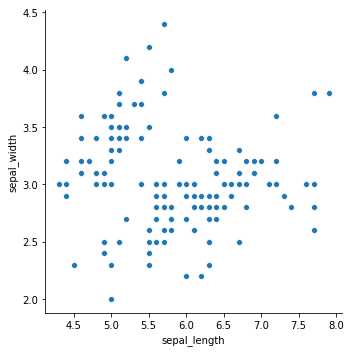

In [4]:
# lets try to visualize features sepal length & width to better understand the data
sns.relplot(x= 'sepal_length', y= 'sepal_width', data=iris)

The above graph does not differentiate between different classifications, hence it is not much helpful

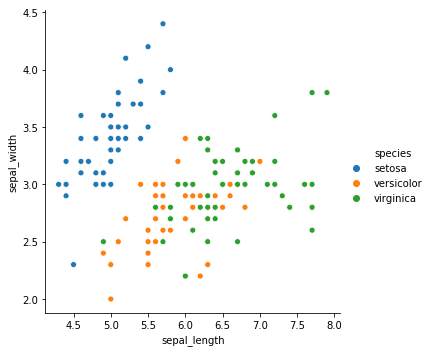

In [5]:
# let us add another dimension - the species dimension using 'hue'
sns.relplot(x= 'sepal_length', y='sepal_width', hue='species', data=iris)

The above graph emphasises the difference between the classes.

We can also achieve the above effect using a 'size' feature, this will make each classification a different size

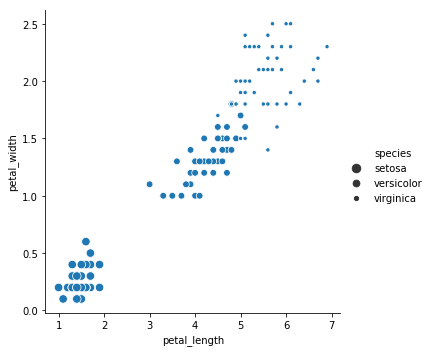

In [6]:
# visualizing petal length & width
sns.relplot(x= 'petal_length', y='petal_width', size='species', data=iris)

#### Emphasizing continuity with line plots

In [7]:
# creating a time series dataset
time = pd.DataFrame(dict(time = np.arange(500), value = np.random.randn(500).cumsum()))

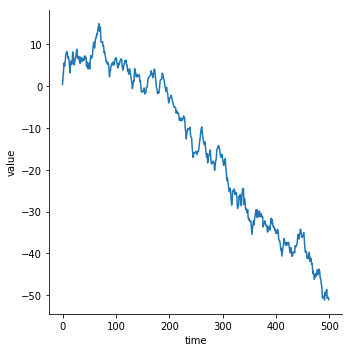

In [8]:
# plotting the time series using a line chart
sns.relplot(x= 'time', y= 'value', kind= 'line', data= time)

In [10]:
# Preview of the titanic dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


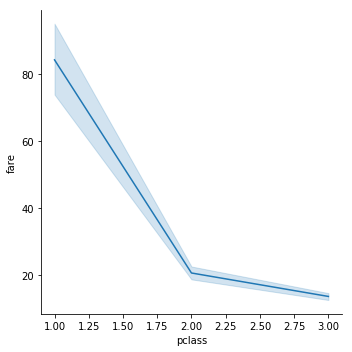

In [11]:
# when there are multiple measurements for the same value 
# ex. in the Titanic database- mulitple 'fare' values for the same 'class'
# seaorn creates a confidence interval to represent them
sns.relplot(x= 'pclass', y= 'fare', kind= 'line', data = titanic)

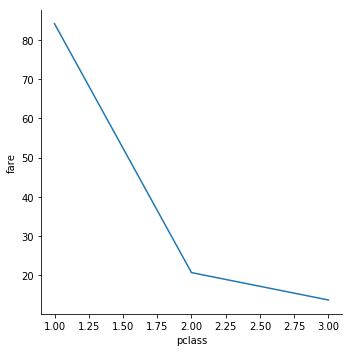

In [12]:
# The CI (confidence interval) feature can be turned off using: None
# It can be changed to standard deviation to represent the distribution at each classification using: 'sd'

sns.relplot(x= 'pclass', y= 'fare', kind= 'line', ci= None, data = titanic)

#### Plotting subsets of data 

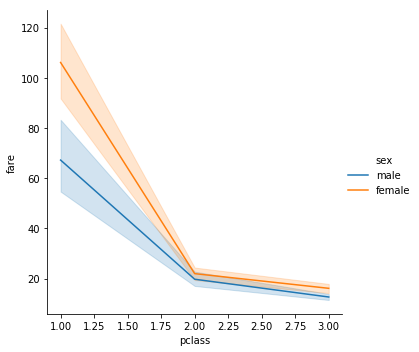

In [13]:
# segregating the fare v. pclass according to sex of the passenger
sns.relplot(x= 'pclass', y= 'fare', kind= 'line', hue='sex', data= titanic)

We observe that fare for females was more than that for males, regardless of class

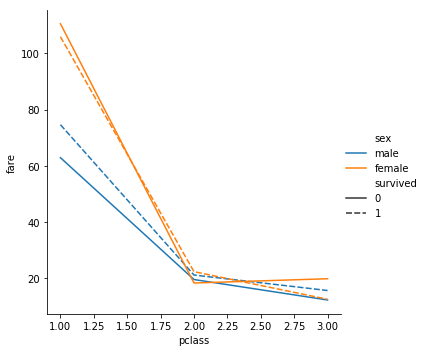

In [14]:
# we can add another variable in this if required using 'event' property
sns.relplot(x= 'pclass', y= 'fare', kind= 'line', hue='sex', style= 'survived', ci= None, data= titanic)

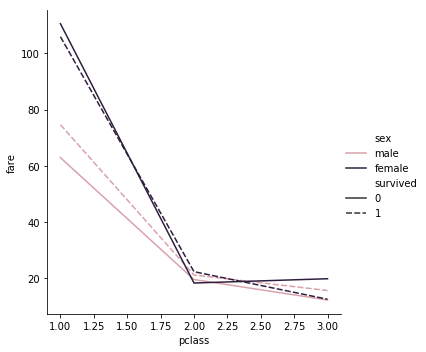

In [15]:
# Changing the color palette
# For a comprehensive list of color palettes, kindly visit the documentation. Link provided at the beginning
palette = sns.cubehelix_palette(light = .7, n_colors= 2)
sns.relplot(x= 'pclass', y= 'fare', kind= 'line', hue='sex', style= 'survived', palette= palette, ci= None, data= titanic)

###### Exploring multi plot graphs

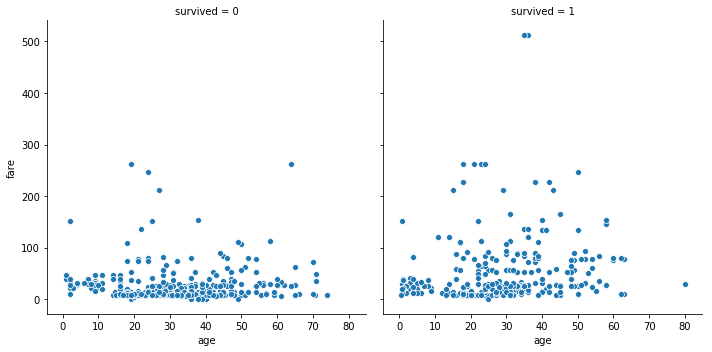

In [16]:
# We use the 'col' feature to create a multi plot graph
# Here each graph/column represents a different classification and the 'x' and 'y' are plotted for each 
sns.relplot(x= 'age', y= 'fare', col='survived', data= titanic)

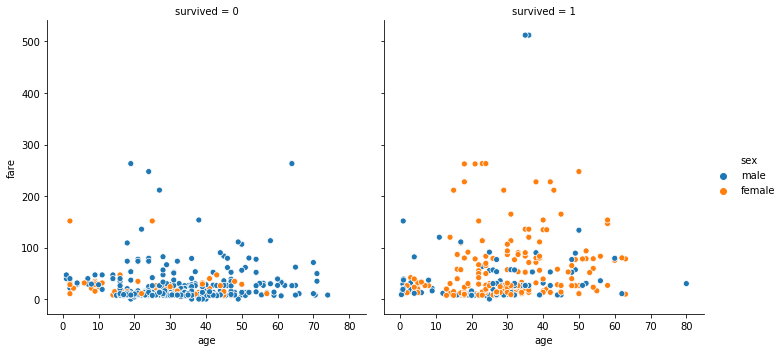

In [17]:
# we can add additional features, as we did earlier
sns.relplot(x= 'age', y= 'fare', col='survived', hue= 'sex', data= titanic)

## Plotting with categorical data

### Categorical scatter plots

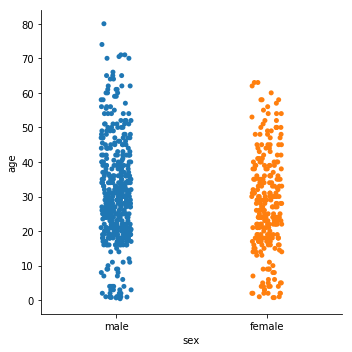

In [18]:
# Default plot with catplot is scatterplot
# This helps in visualizing categorical variables
sns.catplot(x= 'sex', y= 'age', data= titanic)

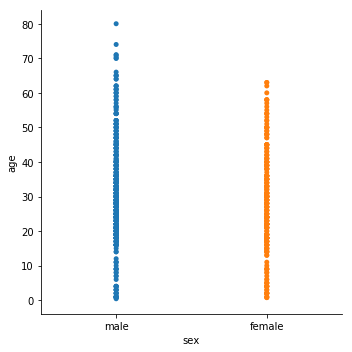

In [19]:
# We can control the magnitude of jitter using the 'jitter' feature
sns.catplot(x= 'sex', y= 'age', jitter= False, data= titanic)

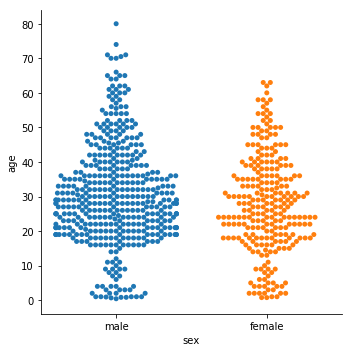

In [20]:
# For small datasets, we can check the distribution of the data using 'swarm' plot
sns.catplot(x= 'sex', y= 'age', kind= 'swarm', data= titanic)

We can observe in the above graph that majority of the males were in the age group of 20 - 40

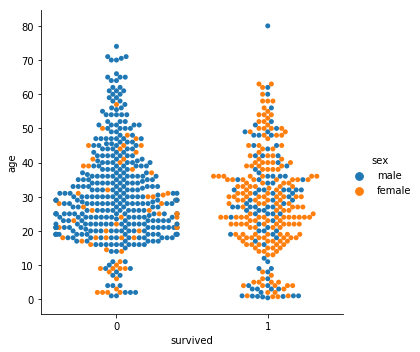

In [21]:
# we can further add more features in the plot using options like 'hue'
sns.catplot(x= 'survived', y= 'age', kind= 'swarm', hue= 'sex', data= titanic)

As the above graph depicts, survival rate was higher for females

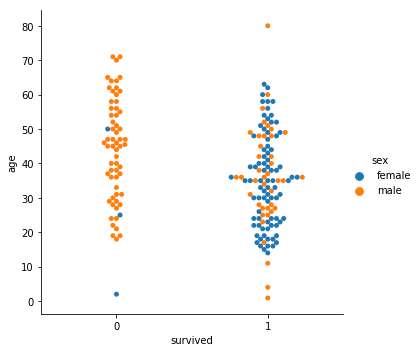

In [23]:
# visualizing a subset of the data
sns.catplot(x= 'survived', y= 'age', kind= 'swarm', hue= 'sex', data= titanic.query('pclass==1'))

We have added a criteria in the plot above- to only display data for PClass = 1. Thus, we can create plots for specific subset of data

### Distribution of observations within categories

#### Boxplots

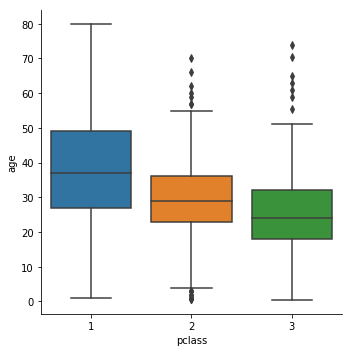

In [24]:
# Age wise distribution in each class
sns.catplot(x= 'pclass', y= 'age', kind= 'box', data= titanic)

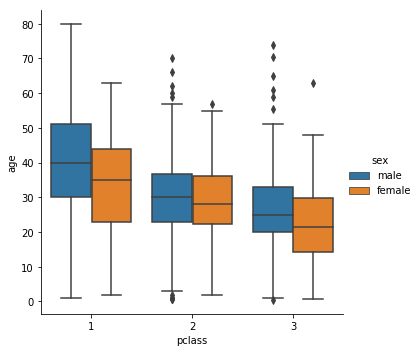

In [25]:
# Adding additional feature 
sns.catplot(x= 'pclass', y= 'age', hue= 'sex', kind= 'box', data= titanic)

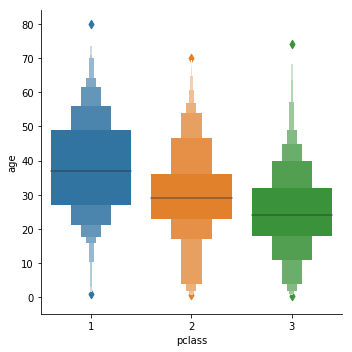

In [26]:
# A better distribution plot is boxen plot for larger datasets, it sshows the shape of distribution as well
sns.catplot(x= 'pclass', y= 'age', kind= 'boxen', data= titanic)

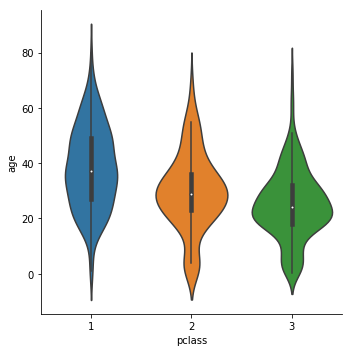

In [27]:
# A violin plot provides distribution along with IQR plot embedded in it
sns.catplot(x= 'pclass', y= 'age', kind= 'violin', data= titanic)

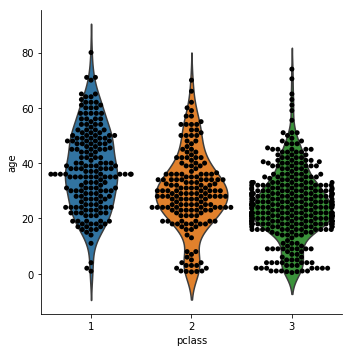

In [28]:
# We can combine swarm and violin plot to show individual points in the distribution
g = sns.catplot(x= 'pclass', y= 'age', kind= 'violin', inner= None, data= titanic)
sns.swarmplot(x= 'pclass', y= 'age', color= 'k', data= titanic, ax= g.ax)

### Statistical estimation within categories

#### Bar plots

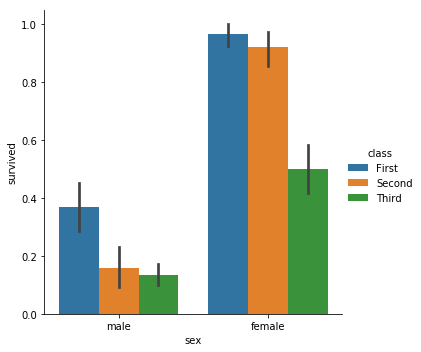

In [29]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

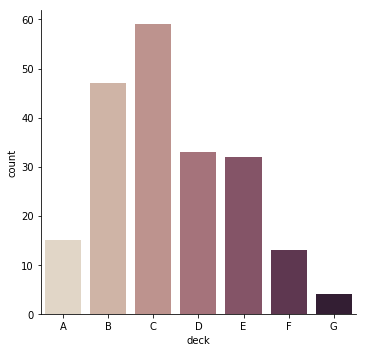

In [30]:
# When we want to show the number of observations in each category without creating a quantitative variable
sns.catplot(x= 'deck', kind= 'count', palette= 'ch:.25', data= titanic)

As we can observe the number of people on deck C were the highest

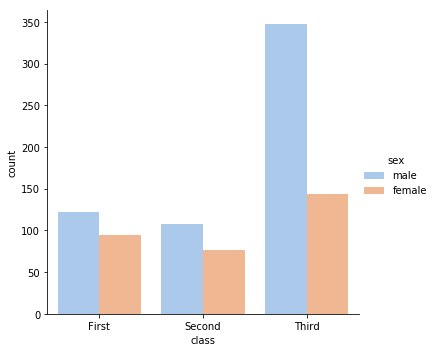

In [31]:
# Adding more variables in our analysis
sns.catplot(x= 'class', kind= 'count', hue='sex', palette= 'pastel', data= titanic)

As we can observe, the number of male, female in PClass 1 and 2 were approximately equal, whereas the number of males were substantially larger than the number of females in PClass 3

#### Point plots

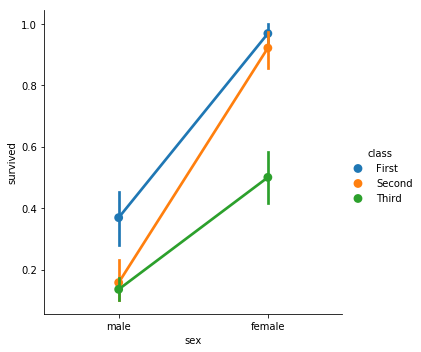

In [32]:
sns.catplot(x= 'sex', y= 'survived', hue= 'class', kind= 'point', data= titanic)

#### Showing multiple relationships through multi-plots

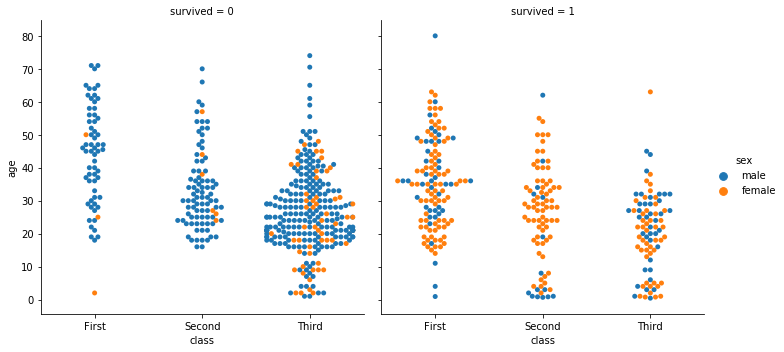

In [33]:
sns.catplot(x= 'class', y= 'age', hue='sex', col= 'survived', kind= 'swarm', data= titanic)

As we observe, female survival rate was higher and female survival rate among PClass 1 and 2 relatively higher than PClass 3

## Visualizing the distribution of a dataset

### Plotting univariate distributions

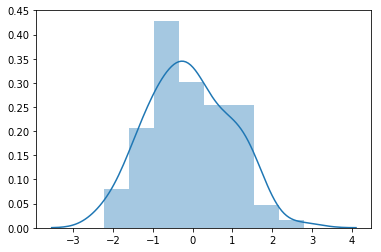

In [34]:
# Creating a variable with gaussian distribution
x= np.random.normal(size= 100)
# Plotting a histogram and a kernel density estimate
sns.distplot(x)

#### Histograms

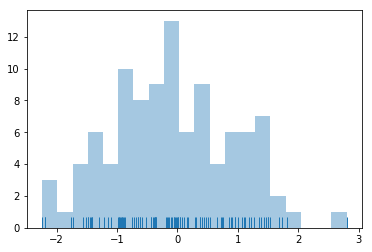

In [35]:
# Plotting a histogram along with a small vertical tick at each observation
sns.distplot(x, bins=20, kde= False, rug= True)

## Building structured multi-plot grids

We have been creating multi plot grids in a way through the 'col' property in relplot and catplot. This is done as each of them uses the FacetGrid object internally.

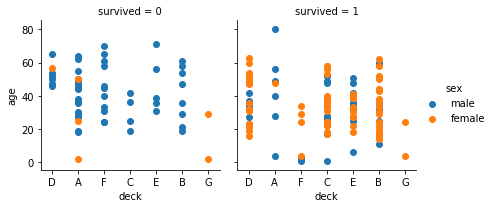

In [36]:
# In multi dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of the dataset
# The followng command is used to initialize the FacetGrid object with dataframe and row, column, hue 
g= sns.FacetGrid(titanic, col= 'survived', hue= 'sex')
# Adding the kind of plot and features to visualize using the 'map' function
g.map(plt.scatter, 'deck', 'age')
g.add_legend()

C:\Users\GS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


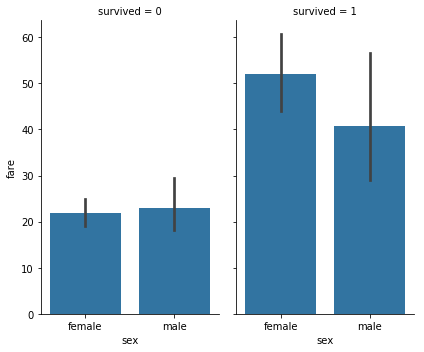

In [37]:
# We can change features like height and aspect to alter the look and feel of the plot
g= sns.FacetGrid(titanic, col= 'survived', height= 5, aspect= .6)
g.map(sns.barplot, 'sex', 'fare')

## Plotting pairwise data relationships

###### Pair plot gives a relationship between each pair of the available features

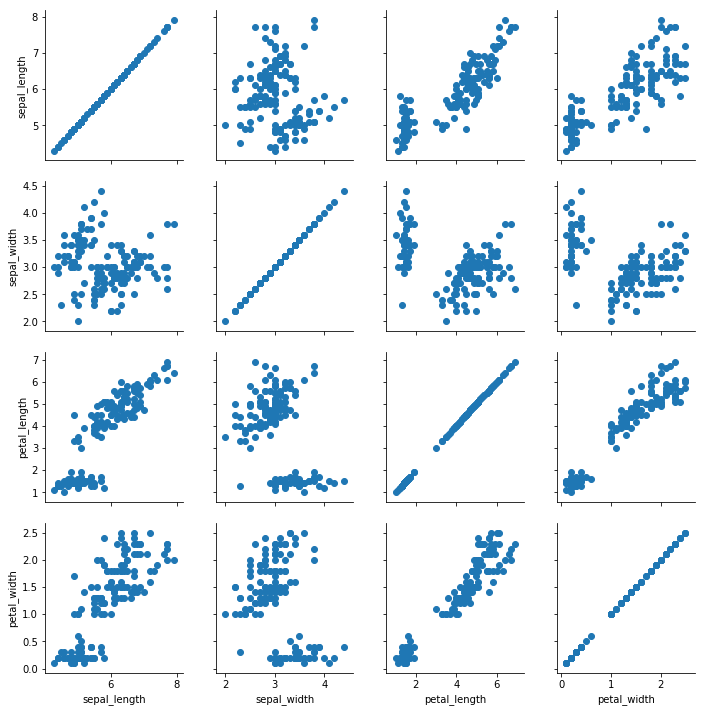

In [38]:
g= sns.PairGrid(iris)
g.map(plt.scatter)

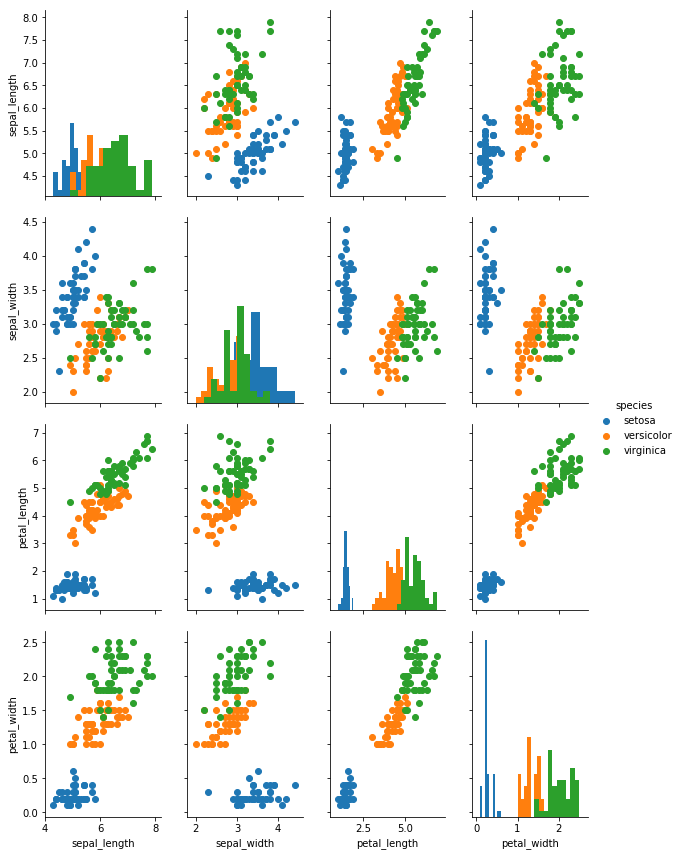

In [39]:
# We can add other features and properties to enhance the visualization
g= sns.PairGrid(iris, hue= 'species', height= 3, aspect= 0.7)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

##### Hope this was useful :)